# 09 進擊的熊貓

先來標準的套件讀入。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 09-1 很棒的課程和資料

上次介紹了 Pandas Q&A 系列影片, 這裡有它的原始檔。最棒的是, 他用的資料都做了很方便的連結。

[Pandas Q&A 原始檔及資料連結](https://github.com/justmarkham/pandas-videos)

比如說, 我們可以拿 UFO 資料庫來用用。

In [2]:
df = pd.read_csv("http://bit.ly/uforeports")

In [3]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


這是不是太方便了!!

## 09-2 Groupby

我們現在想看一下哪一州容易出現 UFO。

In [4]:
df_state = df.groupby("State").count()

In [5]:
df_state.sort_values("Time", ascending=False, inplace=True)

所以加州最容易看到 UFO!! Pandas 其實真的很喜歡把算好的東西放成一個新的 DataFrame。

In [6]:
df_rank = df_state.sort_values("Time", ascending=False)

UFO 10 大州!!

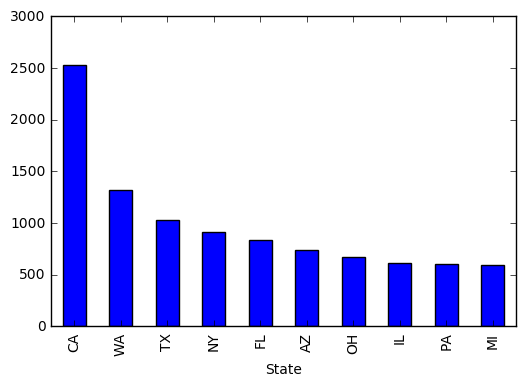

In [7]:
df_rank[:10].Time.plot(kind='bar')

## 09-3 自製一個 DataFrame

一個 DataFrame 基本上包含:
    
1. 資料區 (一個 $m\times n$ 陣列)
2. index (列的名字)
3. columns (行的名字)

#### 小插播

Python 做一個 ['A', 'B', 'C'] 這類的 list 很簡單。

In [8]:
list("ABC")

['A', 'B', 'C']

#### 做一個 DataFrame

In [9]:
df = pd.DataFrame(np.random.randn(5,3), index=list(range(1,6)),
                 columns=list("ABC"))

In [10]:
df

,A,B,C
1,-0.390619,-0.507412,-0.187132
2,0.930274,0.379402,0.214068
3,-0.935295,1.952256,-1.932010
4,1.128447,-0.470233,-0.116660
5,1.601447,-0.329149,0.121009


我們學到了一些 slicing 的方法...

In [11]:
df["A"]

1   -0.390619
2    0.930274
3   -0.935295
4    1.128447
5    1.601447
Name: A, dtype: float64

In [12]:
df.A

1   -0.390619
2    0.930274
3   -0.935295
4    1.128447
5    1.601447
Name: A, dtype: float64

我們也可以模仿以前 array 的方式找出符合條件的資料。例如我們想找 B 這行大於 0 的資料。

In [13]:
df[df.B > 0]

,A,B,C
2,0.930274,0.379402,0.214068
3,-0.935295,1.952256,-1.932010


In [14]:
df[df.B > 0]

,A,B,C
2,0.930274,0.379402,0.214068
3,-0.935295,1.952256,-1.932010


# 09-4 `loc` 定位法

我們想讓 B > 0 的那筆資料, C 都變成 0 (不要問我為什麼, 就高興)

In [15]:
df[df.B > 0]["C"] = 0

/Users/mac/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Wow! Pandas 抗議了, 抗議沒關係, 我們看看它幫我們改了沒有。

In [16]:
df

,A,B,C
1,-0.390619,-0.507412,-0.187132
2,0.930274,0.379402,0.214068
3,-0.935295,1.952256,-1.932010
4,1.128447,-0.470233,-0.116660
5,1.601447,-0.329149,0.121009


沒。有。改!!

這也太可怕了! 這原因是

    df[df.B > 0]["C"]
    
的時候 `pandas` 在

    df[df.B > 0]
    
就回傳一個新的 DataFrame 給你, 然後改了這個 DataFrame 的 C 欄... 因此 `df` 根本沒有碰!!

正確改變要用 `loc`, `loc`, `loc`!!

#### 基本的 `loc` 使用方式

基本上 `loc` 這樣使用

    df[列的範圍, 行的範圍]

In [17]:
df.loc[2:3, "B":"C"]

,B,C
2,0.379402,0.214068
3,1.952256,-1.932010


只有一列或一行就用括號!

In [18]:
df.loc[(2), ("B")]

0.37940242464744467

我們來改改看...

In [19]:
df.loc[(2), ("B")] = -1

In [20]:
df

,A,B,C
1,-0.390619,-0.507412,-0.187132
2,0.930274,-1.000000,0.214068
3,-0.935295,1.952256,-1.932010
4,1.128447,-0.470233,-0.116660
5,1.601447,-0.329149,0.121009


改成了!!

In [21]:
df.loc[df.B > 0, "C"] = 0

In [22]:
df

,A,B,C
1,-0.390619,-0.507412,-0.187132
2,0.930274,-1.000000,0.214068
3,-0.935295,1.952256,0.000000
4,1.128447,-0.470233,-0.116660
5,1.601447,-0.329149,0.121009


就是這樣!

## 09-5 讀入真正的股票資料

自 `pandas` 0.19.0 版開始, `pandas.io.data` 和 `pandas.io.wb` 已經從 `pandas` 系統移出, 獨立在

    pandas_datareader
    
套件中。

使用 Anaconda 的話, 請用標準安裝方式安裝 `pandas-datareader`:
    
    conda install pandas-datareader

In [23]:
import pandas_datareader.data as web
import datetime

這裡除了我們說的 `pandas_datareader`, 還有 `datetime` 是標準的日期套件。

假設我們要 Apple 的股票, 日期從 2010 年 1 月 1 日, 2016 年 10 月 31 日。

In [24]:
symbol = "AAPL"
day_start = datetime.datetime(2010,1,1)
day_end = datetime.datetime(2016,10,31)

In [25]:
df = web.DataReader(symbol, 'yahoo', day_start, day_end)

In [26]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106


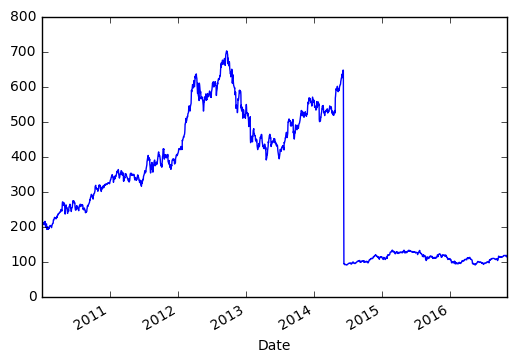

In [27]:
df.Close.plot()

## 09-6 一些基本的計算

#### 差分

我們來考慮股票的計算。其實用點數有時不太容易分析, 我們更重要是看漲還是跌。

換句話說, 我們重視的是

$$S_{j} - S_{j-1}$$

也就是當期和上一期的差別。這樣怎麼算呢?

In [28]:
df["Diff"] = df.Close.diff()

In [29]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Diff
Date,,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252,NaN
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396,0.369995
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683,-3.409998
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936,-0.389995
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106,1.400005


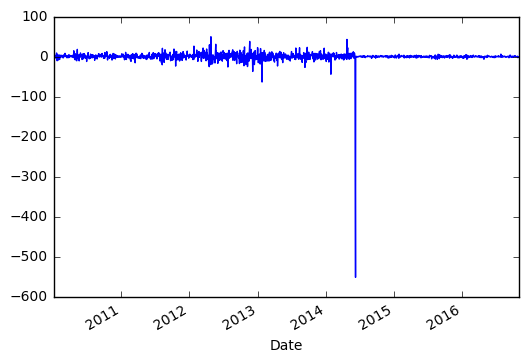

In [30]:
df.Diff.plot()

#### 事實上

更有道理的是取這個值:

$$\frac{S_j - S_{j-1}}{S_{j-1}}$$

In [31]:
df["Rel_Diff"] = df.Diff / df.Close

#### drop 大跳動!!

我們把大跳動的值拿掉 (今天好專業的懷傑告訴我們那是 Apple 股票一拆七所以才有這狂掉五百多點的情況)。

In [32]:
df.drop(df.Diff.argmax())

,Open,High,Low,Close,Volume,Adj Close,Diff,Rel_Diff
Date,,,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252,NaN,NaN
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396,0.369995,0.001726
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683,-3.409998,-0.016163
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936,-0.389995,-0.001852
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106,1.400005,0.006604
2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.339779,-1.870002,-0.008900
2010-01-12,209.189995,209.769995,206.419998,207.720001,148614900,27.028789,-2.390002,-0.011506
2010-01-13,207.870005,210.929995,204.099998,210.650002,151473000,27.410045,2.930001,0.013909
2010-01-14,210.110003,210.459997,209.020004,209.430000,108223500,27.251297,-1.220002,-0.005825


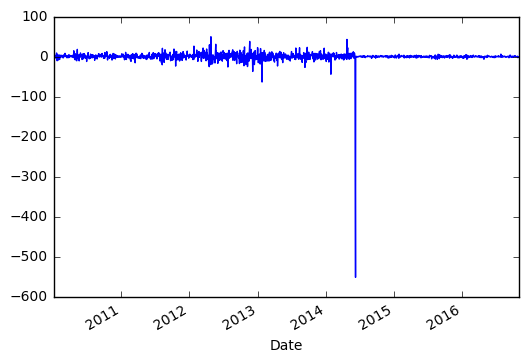

In [33]:
df.Diff.plot()

沒有消失啊!!

#### inplace=True

In [34]:
df.drop(df.Diff.argmin(), inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Diff,Rel_Diff
Date,,,,,,,,
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396,0.369995,0.001726
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683,-3.409998,-0.016163
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936,-0.389995,-0.001852
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106,1.400005,0.006604
2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.339779,-1.870002,-0.008900


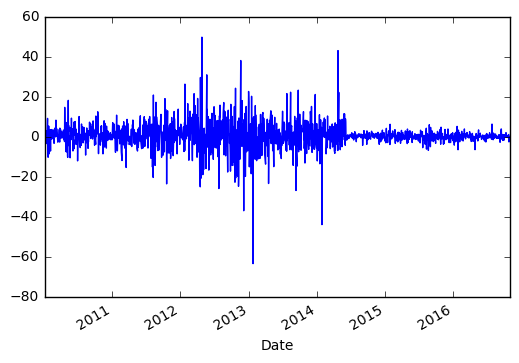

In [37]:
df.Diff.plot()